<center><font size = "10"> Week 10 - Cells in Space  <center>
<center><font size = "8">Home work - Solutions<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 
<br>Group member1: 
<br>Group member2:
<br>Group member3:

## <font color= 'red'>Ex 1:</font> Placing cells

<font size='3'> 21_cells.csv Is a table with (among other information) the positions of neurons in a model of the primary visual cortex (within the cooridnate system of the allen mouse brain atlas).
   The ascii files contain the morphologies of these cells (the number corresponds to the row in the csv).
    
Load the morphologies and dataframe and place the cells at the x, y, z positions reported in the table.
Visualize the morphologies in all three planes.

<font size='3'><font color= 'red'>[1.5 pts]</font>

<span style="color:green">
<font size='3'>

### **Grading**: 

- 1 pts for correct positon
- 0.5 pts for plotting 3 axes

</span>

In [1]:
# Useful functions
def shift_morphology(morph,shift):
    morph2 = morph.transform(lambda p: p + shift)
    return morph2
       
def center_morphology(morph):
    center = morph.soma.center.copy()
    return shift_morphology(morph,-center)

def rotate_morphology(morph,R):
    morph = morph.transform(lambda p: R.dot(p.T).T)
    return morph

def roty(theta):
    radtheta = theta * np.pi / 180.0 # in radians
    R = np.array([[np.cos(radtheta),-np.sin(radtheta),0],
                  [np.sin(radtheta),np.cos(radtheta),0],
                  [0,1,0]])
    return R

def align_morphology_Y(morph,axis):
    # Rotation matrix that aligns the Y axis [0,1,0] to an arbitrary vector b (other than Y or -Y)
    # From https://math.stackexchange.com/a/476311
    a = np.array([0,1,0])

    b = np.array(axis) # target axis
    b = b / np.linalg.norm(b) # make unit norm

    v = np.cross(a,b)     # a x b
    s = np.linalg.norm(v) # ||v|| = sin(theta)
    c = a.dot(b)          # a . b = cos(theta)

    # Skew-symmetric cross-product matrix
    V = np.zeros((3,3))
    V[0,1] = -v[2]
    V[1,0] =  v[2]
    V[0,2] =  v[1]
    V[2,0] = -v[1]
    V[1,2] = -v[0]
    V[2,1] =  v[0]

    # Rotation matrix
    R = np.diag((1.0,1.0,1.0))
    R += V
    R += V.dot(V) * (1.0 - c) / (s * s)

    # Test
    if not np.max(R.dot(a) - b) < 1E-12:
        raise ValueError('Matrix not good!')
    
    # Rotate morphology
    return rotate_morphology(morph,R)

# Poorman's plotting of morphologies
def plot_morphology(morph, plane = 'XY',somaOnly = False):

    colors_dict={nm.BASAL_DENDRITE:'red', 
            nm.APICAL_DENDRITE:'green',
            nm.AXON:'blue',
            nm.SOMA:'black'}

    planes = { 'XY': [0,1], 'XZ': [0,2], 'YZ': [1,2], 'YX': [1,0], 'ZX': [2,0], 'ZY': [2,1] }
   
    if not somaOnly:
        for n in morph.neurites:
            pts = n.points[:,[0,1,2]]
            plt.scatter(pts[:,planes[plane][0]],pts[:,planes[plane][1]],s=1,c=colors_dict[n.type.value],marker='.')
    pts = morph.soma.center
    
    plt.scatter(pts[planes[plane][0]],pts[planes[plane][1]],c=colors_dict[nm.NeuriteType.soma.value],marker='D')

    #plot_morph(morph, plane=plane.lower())

def plot_morphologies(morphlist,plane = 'XY',somaOnly = False):
    fig = plt.figure()
    fig.suptitle(plane)
    
    for i,m in enumerate(morphlist):
        plot_morphology(m, plane = plane, somaOnly = somaOnly)

def morph_get_all_points(morph):
    pts = morph.soma.center.copy()
    for n in morph.neurites:
        pts = np.vstack((pts,n.points[:,[0,1,2]]))
    return pts

In [2]:
import numpy as np
import neurom as nm
from pathlib import Path
import pandas as pd

In [3]:

df = pd.read_csv("toy_data/10um_cells.csv")
morphs = [nm.load_morphology(f"toy_data/morph{i}.asc") for i in df.index]
df

,population,node_ids,@dynamics:AIS_scaler,@dynamics:holding_current,@dynamics:threshold_current,etype,hemisphere,layer,model_template,morph_class,...,orientation_z,region,subregion,synapse_class,x,y,z,u,v,w
0,V1_neurons,2636,1.999871,-0.042052,0.044711,cNAC,right,1,hoc:cNAC_L23BTC,INT,...,0.0,VISp,VISp1,INH,9159.856412,849.607659,8471.411102,0.230151,-0.863247,0.449260
1,V1_neurons,16297,1.083266,-0.006020,0.030312,cADpyr,right,2,hoc:cADpyr_L2IPC_4,PYR,...,0.0,VISp,VISp2,EXC,9142.949909,927.600874,8416.164840,0.229860,-0.864498,0.446998
2,V1_neurons,19473,0.937301,-0.003934,0.025766,cADpyr,right,2,hoc:cADpyr_L2IPC_4,PYR,...,0.0,VISp,VISp2,EXC,9129.453698,938.682191,8412.520125,0.229860,-0.864498,0.446998
3,V1_neurons,45243,3.412109,-0.043973,0.042438,cACint,right,3,hoc:cACint_L23MC,INT,...,0.0,VISp,VISp2,INH,9146.289262,883.907950,8436.281624,0.228312,-0.865317,0.446207
4,V1_neurons,49867,3.578842,-0.043420,0.130344,dNAC,right,3,hoc:dNAC_L23SBC_4,INT,...,0.0,VISp,VISp2,INH,9140.717362,912.379077,8426.266720,0.229901,-0.864030,0.447882
5,V1_neurons,54379,1.617793,-0.012886,0.040922,cADpyr,right,3,hoc:cADpyr_L3TPC,PYR,...,0.0,VISp,VISp3,EXC,9095.146115,1092.275593,8337.665634,0.228679,-0.865692,0.445289
6,V1_neurons,55000,1.513256,-0.008823,0.034102,cADpyr,right,3,hoc:cADpyr_L3TPC,PYR,...,0.0,VISp,VISp3,EXC,9121.813230,981.549318,8386.720091,0.228397,-0.865786,0.445252
7,V1_neurons,61708,1.491607,-0.009060,0.033344,cADpyr,right,3,hoc:cADpyr_L3TPC,PYR,...,0.0,VISp,VISp3,EXC,9106.234251,1047.361725,8354.631173,0.230266,-0.864584,0.446622
8,V1_neurons,62482,1.562347,-0.011718,0.037891,cADpyr,right,3,hoc:cADpyr_L3TPC,PYR,...,0.0,VISp,VISp3,EXC,9091.511434,1090.605112,8333.323653,0.228679,-0.865692,0.445289
9,V1_neurons,70578,1.451016,-0.008049,0.031070,cADpyr,right,3,hoc:cADpyr_L3TPC,PYR,...,0.0,VISp,VISp3,EXC,9133.104657,996.268111,8389.060329,0.231642,-0.863529,0.447952


In [4]:
for i,m in enumerate(morphs):
    m=center_morphology(m)
    m=shift_morphology(m, df.loc[i, ['x', 'y', 'z']].values)
    morphs[i]=m


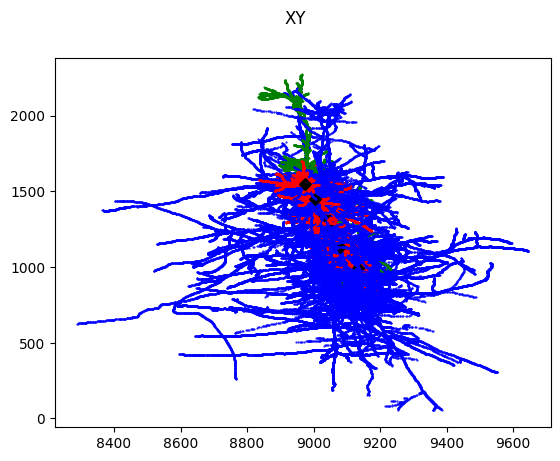

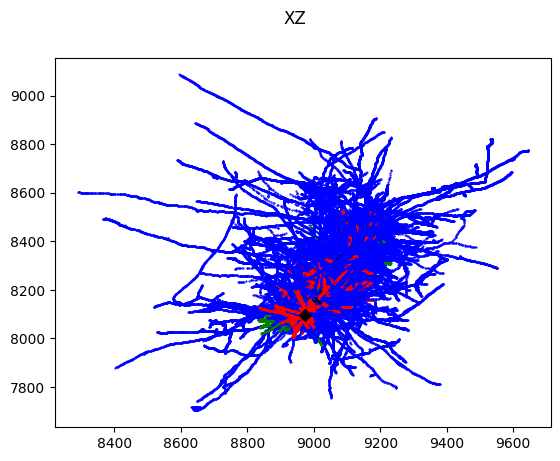

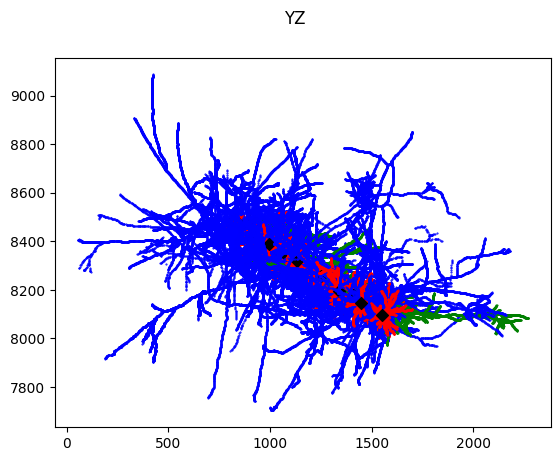

In [5]:
import matplotlib.pyplot as plt
planes = ['XY','XZ','YZ']
ax = [[0,1],[0,2],[1,2]]
for i,Plane in enumerate(planes):
    # Plot whole morphologies
    plot_morphologies(morphs,plane=Plane)


## <font color= 'red'>Ex 2:</font> Rotate cells

Align each cell's y-axis with the vector 'u', 'v', 'w'  reported for it in 21_cells.csv.
At the end of this part their soma positions should still be the same as they were at the end of Ex 1.
Visualize them again in all three planes.

Hint: consider the order of rotation/translation operations.

<span style="color:green">
<font size='3'>

### **Grading**: 

- 1 pts for correct rotation and positon
- 0.5 pts for plotting 3 axes

</span>

In [6]:

for i, morph in enumerate(morphs):
    morph = center_morphology(morph)
    morph = align_morphology_Y(morph, np.float32(df.loc[i, ['u', 'v', 'w']].values))
    morph = shift_morphology(morph, df.loc[i, ['x', 'y', 'z']].values)
    morphs[i] = morph

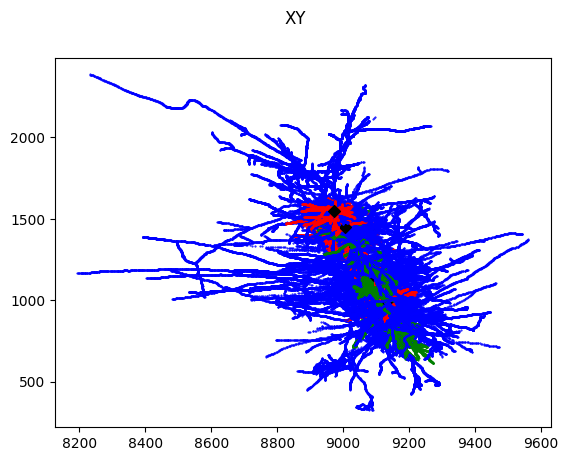

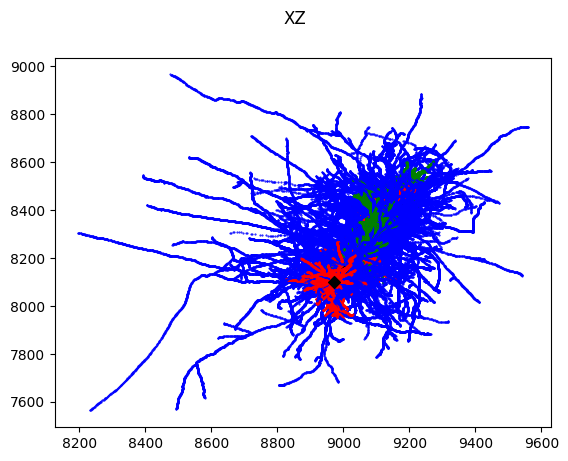

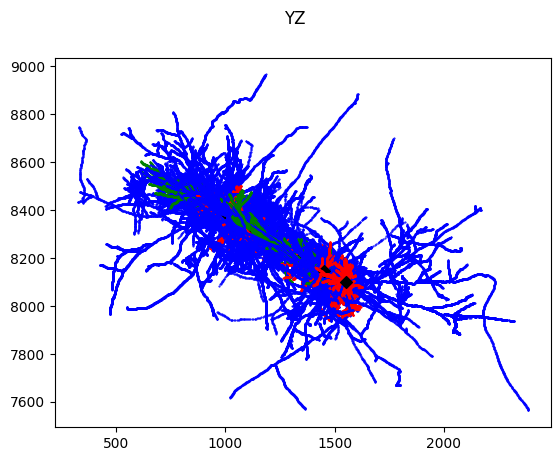

In [7]:
import matplotlib.pyplot as plt
planes = ['XY','XZ','YZ']
ax = [[0,1],[0,2],[1,2]]
for i,Plane in enumerate(planes):
    # Plot whole morphologies
    plot_morphologies(morphs,plane=Plane)
    

## <font color= 'red'>Ex 3:</font> Synaptic pruning rules
<font size=4>
To anatomically constrain the connectivity between the neurons using this geometry we need to identify the potential synapse sites between them. 
However, going from potential synapse sites to actual synapse sites is generally not straightforward.

We are not going to implement the above algorithm, instead we will do something simpler.

Suppose in the brain region we are modeling we have only very coarse-grained data on connection probability: the overall connection probability for cells with soma within 10um of an inserted electrode. This data reveals an overall connection probability of 0.05. Additionally, we have some data that the number of synapses per connection within this brain region tends to be a poisson distribution with a mean of 6.
    
To add the anatomical constraint, we apply a simple version of Peters' rule where we assume that the expectation value of the number of synapses between a pair of neurons is proportional to the number of potential synapse sites.

$E[n_{syn}|n_{app}=\hat{n_{app}}] = C \hat{n_{app}}$
    
Where $n_{syn}$ and $n_{app}$ are the number of synapses and appositions(potential synapse sites) respectively, and C is a constant.
    
Conditional expectation value is defined as:
    
    
$ E[n_{syn}|n_{app}=\hat{n_{app}}] = \sum_{\hat{n_{syn}} = 0}^{\infty} \hat{n_{syn}} P(n_{syn}=\hat{n_{syn}}|n_{app}=\hat{n_{app}})$
    
The simplest solution that satisfies this constraint is to have a fixed probability of converting a potential synapse site into an actual synapse, leading to a binomial distribution.

$P(n_{syn}=\hat{n_{syn}}|n_{app}=\hat{n_{app}}) = Binom(n=\hat{n_{app}}, k=\hat{n_{syn}}, p=C)$
    
We recieve some data that the average density of synapses is 28% of the density of potential synapse sites, setting C at 0.28.

appositions.csv contains all potential synapse sites identified between the 21 neurons we placed before.
Apply this general pruning and provide a dataframe of actualy synapses based on it.

Subsequently:
    
    - calculate the overall connection probability. 
    - plot a histogram of the number of synapses per connection. Ensure you use a bin size of 1 (so 1, 2, 3, 4 etc.)
    - on the same axis, plot the probability mass function of a poisson dstribution at 6 synapses per connection.

Based on these outcomes, what are some limitations of this naive synapse placement rule? Can you suggest one or more improvements that would lead to more realistic connectivity?

<font color='red'> [3 pts]
    
Further reading: 
    This problem gets far more complex when you consider that each brain region consists of many cell types with differing connectivity properties.
    for an example of how this kind of problem can be addressed in practice, see this paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4597796/ 

<span style="color:green">
<font size='3'>

### **Grading**: 

- 0.5 pt for implementing the rule.
- 0.5 pts each for connection probability and synapses per connection.
- 1 pts for answering the questions

</span>

In [49]:
# import
%matplotlib inline

import matplotlib.pyplot as plt
import neurom as nm
import numpy as np 
import pandas as pd
import scipy

In [50]:
appositions = pd.read_csv("toy_data/10um_appositions.csv")

C = 0.28
synapses = appositions[np.random.uniform(0, 1, size=len(appositions)) < C]


In [51]:
connections = synapses.groupby(['@source_node', '@target_node'])['edge_ids'].count()
connections

@source_node  @target_node
2636          16297            9
              19473            9
              45243           12
              49867            1
              54379            3
                              ..
169253        157828           1
171009        149948           4
              157828           6
              168462           3
              169253           3
Name: edge_ids, Length: 139, dtype: int64

0.31519274376417233


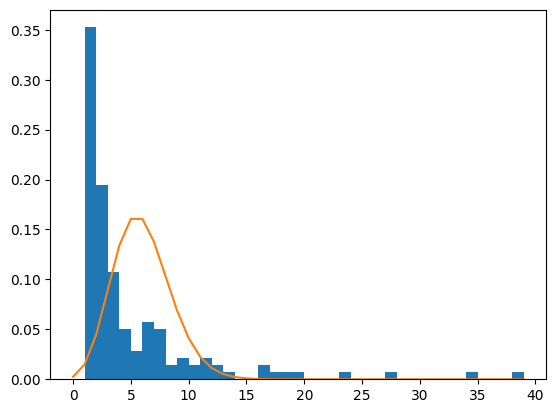

In [55]:
print(len(connections) / (21*21))
plt.hist(connections, bins=np.arange(0, 40), density=True)
plt.plot(scipy.stats.poisson.pmf(np.arange(0, 40), mu=6))

<font color='blue'>
    Answers:
        This kind of synapse placement rule will overestimate synapses per connection and wind up placing a lot of connections with only one synapse, which should be in the minority in reality.
        Any suggestion which would shift the mode of the distribution of synapses per connecton higher and reduce connection probability is accepted.